In [30]:
def data_read_display(data): #input data is already a numpy data type
    """ 
	when passed the full filename (path plus filename) of a deep learning dataset
	This function reads the binary data and rescales it
	reforms it from vector into array of the proper size
	rails the data off at suggested maximum and minimum values
	displays the data as grayscale on black background
    """

    import numpy as np
    import matplotlib.pyplot as plt

    dims = (126,201)   # rows, columns

    minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall

    data = np.reshape(data,dims)
    
    if (np.max(data) > 0):

        if (minmax[0] > 0 or minmax[1] > 0):
            data[(data < minmax[0])] = minmax[0]
            data[(data > minmax[1])] = minmax[1]
            data = (data - minmax[0])/(minmax[1] - minmax[0])
        else:
            data = (data - np.min(data))/(np.max(data) - np.min(data))

    else:
        print('empty hour!')

    plt.imshow(data, cmap='Paired', origin='lower')


In [33]:
def get_average_values(directoryname):
    import os
    import numpy as np
    '''
    for data in os.listdir(directoryname):   
        #print(data)
        the_data = np.fromfile(directoryname+data,dtype='int16',count=-1,sep='')
        
        print(the_data, the_data.shape)
    print(list(map(np.fromfile(directoryname+data,dtype='int16',count=-1,sep=''), )))
    '''

    data = os.listdir(directoryname)
  
    data_list = [np.fromfile(directoryname+d,dtype='int16',count=-1,sep='') for d in data]
    
    count = len(data_list)
    test_list = list(map(sum, zip(*data_list)))
    new_list = list(map(lambda x:x/count, test_list))
    return new_list

def average_data(directoryname):
    import os
    import numpy as np
    list_len = len(np.fromfile(directoryname+os.listdir(directoryname)[0],dtype='int16',count=-1,sep=''))
    output_list = np.zeros(list_len)#[0] * list_len
    for data in os.listdir(directoryname):
        d = (np.fromfile(directoryname+data,dtype='int16',count=-1,sep=''))
        output_list=output_list + d
   
    return output_list/list_len

radar.2016.12


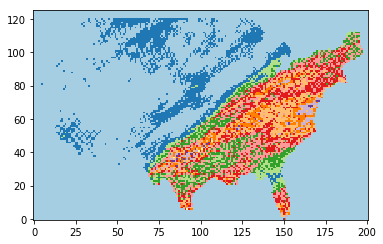

In [45]:
import numpy as np
#data = np.fromfile("/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2008.06/radar.20080601.00.dat",dtype='int16',count=-1,sep='') # 2 byte integers
#data_read_display(data)
test = average_data("/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2016.12/")
#print(len(test))
#print(type(test))
print("radar.2016.12")
data_read_display(test)

/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2010.12
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2013.06
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2017.12
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2009.12
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2016.12
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2008.12
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2017.06
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2013.12
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2015.06
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2015.12
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2012.12
/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/radar.2014.12
/home/yuan/Documents/Spring-2018/Senior 

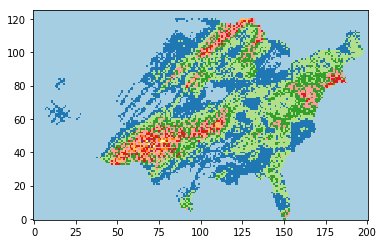

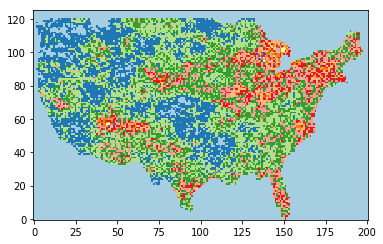

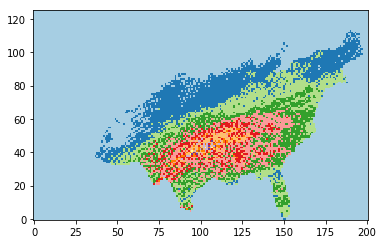

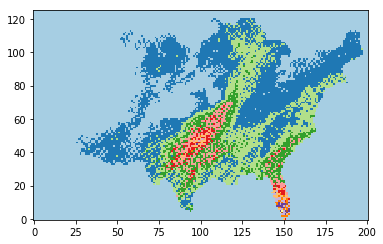

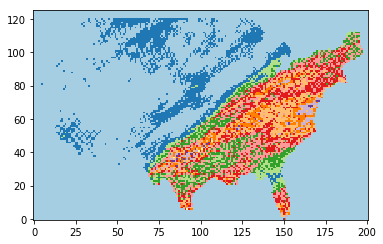

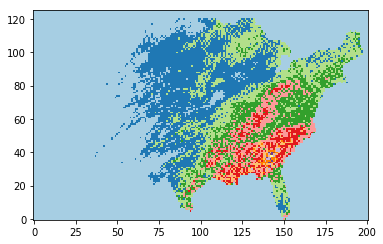

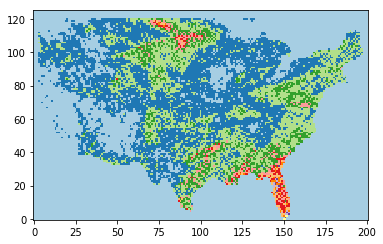

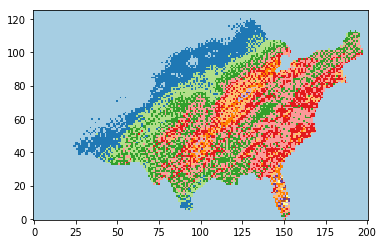

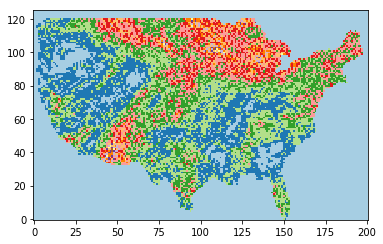

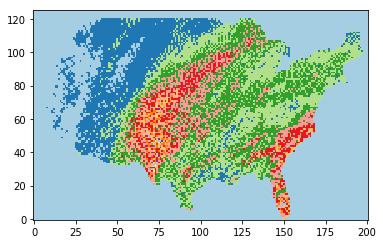

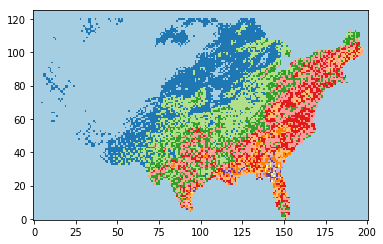

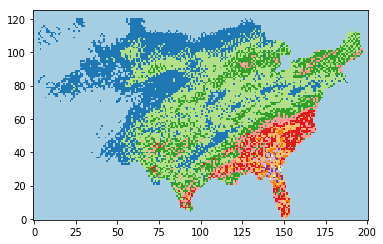

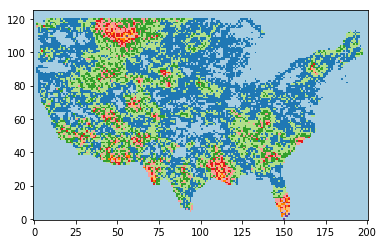

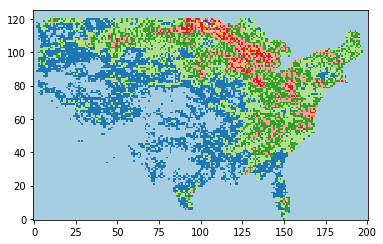

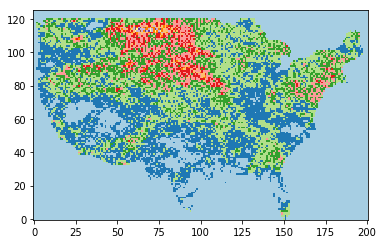

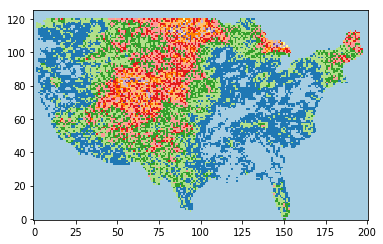

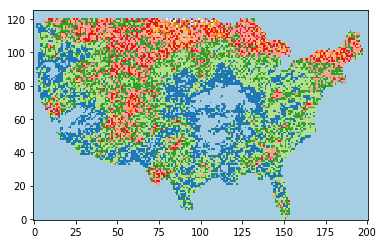

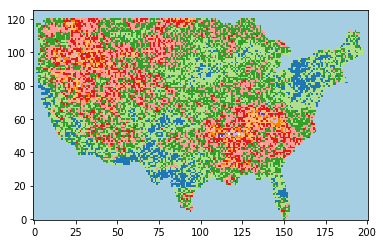

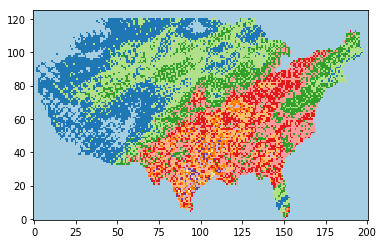

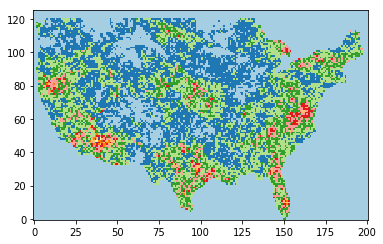

In [47]:
def loop_over_all_images(directoryname):
    import os
    import numpy as np
    import matplotlib.pyplot as plt

    for month_file in os.listdir(directoryname):
        data = average_data(directoryname + month_file + "/")
           
        dims = (126,201)   # rows, columns

        minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall

        data = np.reshape(data,dims)
    
        if (np.max(data) > 0):

            if (minmax[0] > 0 or minmax[1] > 0):
                data[(data < minmax[0])] = minmax[0]
                data[(data > minmax[1])] = minmax[1]
                data = (data - minmax[0])/(minmax[1] - minmax[0])
            else:
                data = (data - np.min(data))/(np.max(data) - np.min(data))
    
        else:
            print('empty hour!')
        print(directoryname+month_file)
        plt.figure()
        plt.imshow(data, cmap='Paired', origin='lower')

        
loop_over_all_images("/home/yuan/Documents/Spring-2018/Senior Design/Weather/radar-data/")